<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/Spotify_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation

This section is where we import the packages we need, import the data and then get it sorted out and ready to be used.

In [1]:
# Import Statements
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import altair as alt
import seaborn as sns
import numpy as py
import pandas as pd

In [2]:
# Read in the data
spotify = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data.csv')
spotify_by_artist = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data_by_artist.csv')
spotify_by_artist_with_genre = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data_by_artist_w_genres.csv')
spotify_by_genre = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data_by_genres.csv')
spotify_by_year = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/spotify/data_by_year.csv')

spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
# Create datasets with continuous data
categorical_data_columns = ['artists', 'explicit', 'id', 'key', 'mode', 'name', 'release_date', 'year']

spotify_continuous = spotify.drop(columns=categorical_data_columns)
# spotify_by_artist_continuous = spotify_by_artist.drop(columns=categorical_data_columns)
# spotify_by_artist_with_genre_continuous = spotify_by_artist_with_genre.drop(columns=categorical_data_columns)
# spotify_by_genre_continuous = spotify_by_genre.drop(columns=categorical_data_columns)
# spotify_by_year_continuous = spotify_by_year.drop(columns=categorical_data_columns)

# Create datasets with categorical data
continuous_data_columns = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
spotify_categorical = spotify.drop(columns=continuous_data_columns)
spotify_by_artist_categorical = spotify_by_artist.drop(columns=['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','key','mode'])
# spotify_by_artist_with_genre_categorical = spotify_by_artist_with_genre.drop(columns=continuous_data_columns)
# spotify_by_genre_categorical = spotify_by_genre.drop(columns=continuous_data_columns)
# spotify_by_year_categorical = spotify_by_year.drop(columns=continuous_data_columns)

spotify_continuous_recent = spotify[spotify['year'] >= 2010]
spotify_continuous_recent = spotify_continuous_recent.drop(columns=categorical_data_columns)

spotify_continuous_recent.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
count,21656.000000,21656.000000,2.165600e+04,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000,21656.000000
mean,0.255491,0.605048,2.224077e+05,0.631091,0.068246,0.188202,-7.368521,59.850526,0.104421,120.820850,0.463231
std,0.287580,0.170475,8.546179e+04,0.217466,0.217755,0.152302,4.695158,10.537460,0.110202,30.662387,0.240015
min,0.000000,0.000000,3.030100e+04,0.000020,0.000000,0.000000,-54.376000,0.000000,0.000000,0.000000,0.000000
25%,0.026075,0.502000,1.871930e+05,0.500000,0.000000,0.097500,-8.332000,53.000000,0.037200,96.808250,0.276000
50%,0.131000,0.618000,2.148800e+05,0.658000,0.000001,0.124000,-6.282500,60.000000,0.054900,120.051000,0.452000
75%,0.409000,0.730000,2.463218e+05,0.798000,0.000450,0.232000,-4.806000,66.000000,0.123000,140.923250,0.643000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.990000,1.023000,100.000000,0.950000,220.099000,0.990000


In [4]:
spotify.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


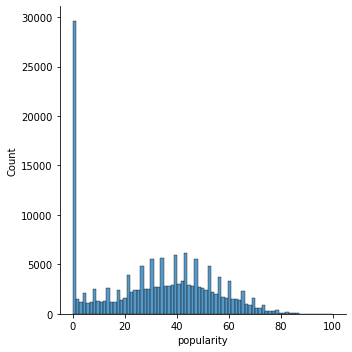

In [5]:
# Graph the distribution of values for popularity of songs in the spotify dataset

sns.displot(spotify, x="popularity")


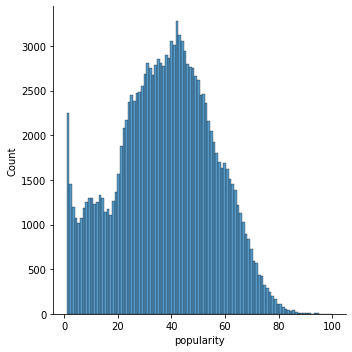

In [6]:
# Drop the 0 popularity score to create a more normal distribution
spotify = spotify[spotify['popularity'] != 0]

sns.displot(spotify, x="popularity")


In [7]:
# Do this for the continuous dataset
spotify_continuous = spotify_continuous[spotify_continuous['popularity'] != 0]

In [8]:
# Scale the data using a Standard Scaler
standard_scaler = StandardScaler()

# Scaled the continuous data to normalize the values for training our model.
std_scaled_spotify_continuous = standard_scaler.fit_transform(spotify_continuous.drop(columns=['popularity']))
std_scaled_spotify_continuous = pd.DataFrame(data=std_scaled_spotify_continuous, columns=[continuous_data_columns])

std_scaled_spotify_continuous_recent = standard_scaler.fit_transform(spotify_continuous_recent.drop(columns=['popularity']))
std_scaled_spotify_continuous_recent = pd.DataFrame(data=std_scaled_spotify_continuous_recent, columns=[continuous_data_columns])

# std_scaled_spotify_by_artist_continuous = standard_scaler.fit_transform(spotify_by_artist_continuous.drop(columns=['popularity']))
# std_scaled_spotify_by_artist_with_genre_continuous = standard_scaler.fit_transform(spotify_by_artist_with_genre_continuous.drop(columns=['popularity']))
# std_scaled_spotify_by_genre_continuous = standard_scaler.fit_transform(spotify_by_genre_continuous.drop(columns=['popularity']))
# std_scaled_spotify_by_year_continuous = standard_scaler.fit_transform(spotify_by_year_continuous.drop(columns=['popularity']))


# Graphical Data

Here wee can look at the data visually for some of the smaller datasets that will hopefully show some information regarding popularity in relation to various categories.

In [ ]:
# Plot the popularity of songs over time
popularity_by_year = alt.Chart(spotify_by_year).mark_point(filled=True).encode(
    alt.X('popularity'),
    alt.Y('year', scale=alt.Scale(domain=[1900, 2030])), 
)
popularity_by_year

alt.Chart(...)

In [ ]:
# Plot the popularity of songs by genre over 50%
spotify_by_genre_over_50 = spotify_by_genre[spotify_by_genre['popularity'] >= 50]
popularity_by_genre = alt.Chart(spotify_by_genre_over_50).mark_point(filled=True).encode(
    alt.X('genres'),
    alt.Y('popularity'), 
)
popularity_by_genre

alt.Chart(...)

# Training the Models

Here we will train the continuous data on a K Nearest Neighbors Regression Model and the categorical data will be trained on the K Nearest Neighbors Classifier.

In [ ]:
# Create training data
spotify_continuous_y = spotify_continuous['popularity']
spotify_continuous_X = pd.get_dummies(std_scaled_spotify_continuous, drop_first=True)
spotify_continuous_X_train, spotify_continuous_X_test, spotify_continuous_y_train, spotify_continuous_y_test = train_test_split(spotify_continuous_X, spotify_continuous_y, test_size=0.30, random_state=42)



In [ ]:
spotify_continuous_y_recent = spotify_continuous_recent['popularity']
spotify_continuous_X_recent = pd.get_dummies(std_scaled_spotify_continuous_recent, drop_first=True)
spotify_continuous_X_train_recent, spotify_continuous_X_test_recent, spotify_continuous_y_train_recent, spotify_continuous_y_test_recent = train_test_split(spotify_continuous_X_recent, spotify_continuous_y_recent, test_size=0.30, random_state=42)

In [ ]:
# Determine the number of neighbors is best 412 is a base number being a square root of our total number of rows.
knn = KNeighborsRegressor()

# Test out various numbers of neighbors for our regression model. 412 is a baseline and we add or subtract a percentage of neighbors to test other values.
spotify_continuous_parameters = {'n_neighbors':[309, 412, 618]}
spotify_continuous_clf = GridSearchCV(knn, spotify_continuous_parameters)
spotify_continuous_clf.fit(spotify_continuous_X_train, spotify_continuous_y_train)

In [ ]:
# Create the Regression Model with the optimized number of neighbors
number_of_neighbors = spotify_continuous_clf.best_params_.get('n_neighbors')
knn = KNeighborsRegressor(n_neighbors=number_of_neighbors)

popularity_model = knn.fit(spotify_continuous_X_train, spotify_continuous_y_train)
prediction = popularity_model.predict(spotify_continuous_X_test)
popularity_model.score(spotify_continuous_X_test, spotify_continuous_y_test)



0.4115959580226193

In [ ]:
# Create the Regression Model with the optimized number of neighbors
number_of_neighbors = spotify_continuous_clf.best_params_.get('n_neighbors')
knn = KNeighborsRegressor(n_neighbors=number_of_neighbors)

recent_popularity_model = knn.fit(spotify_continuous_X_train_recent, spotify_continuous_y_train_recent)
recent_prediction = recent_popularity_model.predict(spotify_continuous_X_test_recent)
recent_popularity_model.score(spotify_continuous_X_test_recent, spotify_continuous_y_test_recent)

0.0818454533269195

## Classification

This section will take a look at the categorical data to help us determine what categories help determine the popularity of a song.

In [ ]:
# Lets take a look at the artist data sorted by the number of songs they have released and the popularity of the artist.

In [ ]:
spotify_by_artist_categorical.sort_values(by=['count', 'popularity'])

,artists,popularity,count
82,2nd Generation Outlawz,0.000000,1
194,A. Likiardopoulou,0.000000,1
197,A. Merangulian,0.000000,1
312,Absis,0.000000,1
403,Adriana Chamorro,0.000000,1
...,...,...,...
10313,Ignacio Corsini,0.024194,1240
8103,Frank Sinatra,26.004383,1369
27523,Эрих Мария Ремарк,0.000000,1562
27524,Эрнест Хемингуэй,0.000000,2430


In [ ]:
spotify_by_artist_categorical_y = spotify_by_artist_categorical['popularity']
spotify_by_artist_categorical_X = pd.get_dummies(spotify_by_artist_categorical.drop(columns=['popularity', 'count']), drop_first=True)
spotify_by_artist_categorical_X_train, spotify_by_artist_categorical_X_test, spotify_by_artist_categorical_y_train, spotify_by_artist_categorical_y_test = train_test_split(spotify_by_artist_categorical_X, spotify_by_artist_categorical_y, test_size=0.30, random_state=42)